In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [3]:
df = pd.read_csv("./IMDB_Dataset.csv")
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,2343110,"2,83,41,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,1620367,"13,49,66,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,2303232,"53,48,58,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,1129952,"5,73,00,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,689845,"43,60,000"


In [4]:
# Basic information about the dataset
df.info()

# Summary of numerical columns
df.describe()

# Check data types of each column
df.dtypes

# Display the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   650 non-null    object 
 1   Released_Year  650 non-null    int64  
 2   Certificate    580 non-null    object 
 3   Runtime        650 non-null    object 
 4   Genre          650 non-null    object 
 5   IMDB_Rating    650 non-null    float64
 6   Overview       650 non-null    object 
 7   Meta_score     516 non-null    float64
 8   Director       650 non-null    object 
 9   Star           650 non-null    object 
 10  No_of_Votes    650 non-null    int64  
 11  Gross          534 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 61.1+ KB
Dataset contains 650 rows and 12 columns.


In [5]:
df['Gross'] = df['Gross'].str.replace(',', '')
print(df['Gross'].head(1))

df['Gross'] = df['Gross'].astype('float64')
df['Gross'] = df['Gross'].replace(np.nan, 0)

0    28341469
Name: Gross, dtype: object


               Missing Values  Percentage
Series_Title                0    0.000000
Released_Year               0    0.000000
Certificate                70   10.769231
Runtime                     0    0.000000
Genre                       0    0.000000
IMDB_Rating                 0    0.000000
Overview                    0    0.000000
Meta_score                134   20.615385
Director                    0    0.000000
Star                        0    0.000000
No_of_Votes                 0    0.000000
Gross                       0    0.000000


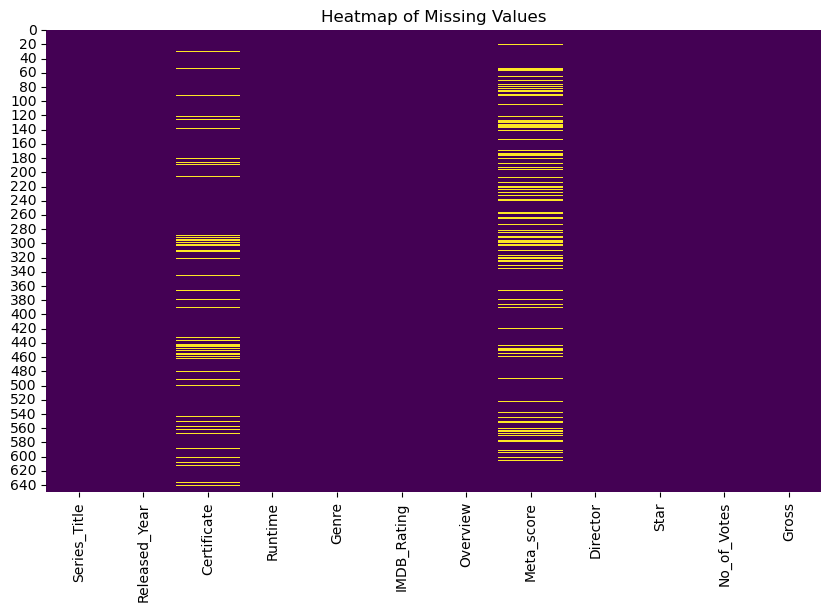

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine and display
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [7]:
# Check for infinite values in numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    inf_count = df[col].isin([np.inf, -np.inf]).sum()
    if inf_count > 0:
        print(f"Column '{col}' contains {inf_count} infinite values.")

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
# Fill missing values for numerical columns with the mean (example)
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [9]:
#Replace missing values in categorical columns.
df['Certificate'] = df['Certificate'].fillna('Unknown')

               Missing Values  Percentage
Series_Title                0         0.0
Released_Year               0         0.0
Certificate                 0         0.0
Runtime                     0         0.0
Genre                       0         0.0
IMDB_Rating                 0         0.0
Overview                    0         0.0
Meta_score                  0         0.0
Director                    0         0.0
Star                        0         0.0
No_of_Votes                 0         0.0
Gross                       0         0.0


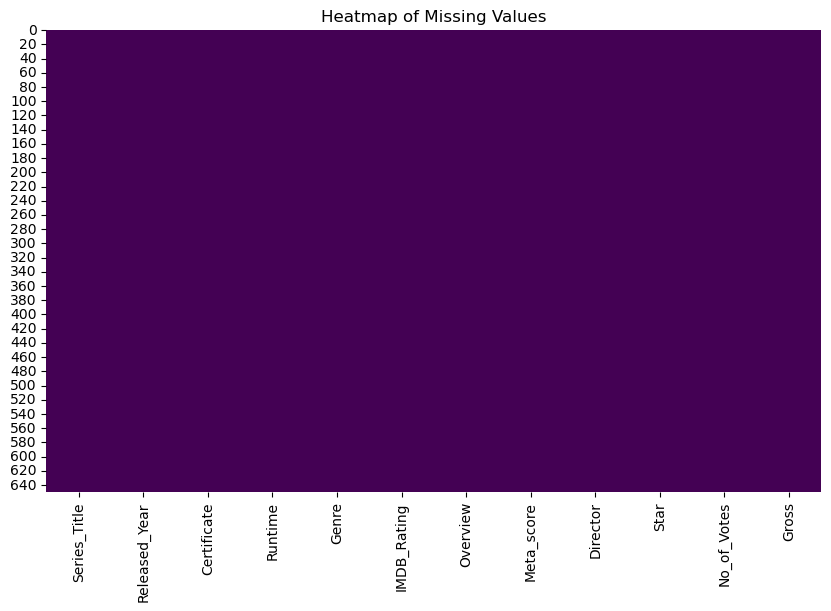

In [10]:
# Check for missing values
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine and display
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [11]:
# Check and count duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
df = df.drop_duplicates()

Number of duplicate rows: 0


In [12]:
df.drop(columns=['Series_Title'], inplace=True)
df.drop(columns=['Overview'], inplace=True)
df.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star,No_of_Votes,Gross
0,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,2343110,28341469.0
1,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,1620367,134966411.0
2,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,2303232,534858444.0
3,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0
4,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,689845,4360000.0


In [13]:
# Converting 'Runtime' column (e.g., '142 min') to numeric
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

# Label Encoding for all non-numeric columns
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is non-numeric
        df[col] = label_encoder.fit_transform(df[col])

# Display the transformed dataframe
print("Updated Numeric DataFrame:")
print(df.head())

# Verify the data types
print("\nData Types after Encoding:")
print(df.dtypes)

Updated Numeric DataFrame:
   Released_Year  Certificate  Runtime  Genre  IMDB_Rating  Meta_score  \
0           1994            1      142    117          9.3        80.0   
1           1972            1      175    103          9.2       100.0   
2           2008           13      152     17          9.0        84.0   
3           1974            1      202    103          9.0        90.0   
4           1957           12       96    103          9.0        96.0   

   Director  Star  No_of_Votes        Gross  
0        97   412      2343110   28341469.0  
1        95   291      1620367  134966411.0  
2        54    90      2303232  534858444.0  
3        95     7      1129952   57300000.0  
4       318   183       689845    4360000.0  

Data Types after Encoding:
Released_Year      int64
Certificate        int32
Runtime            int32
Genre              int32
IMDB_Rating      float64
Meta_score       float64
Director           int32
Star               int32
No_of_Votes        int64

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1200x1200 with 0 Axes>

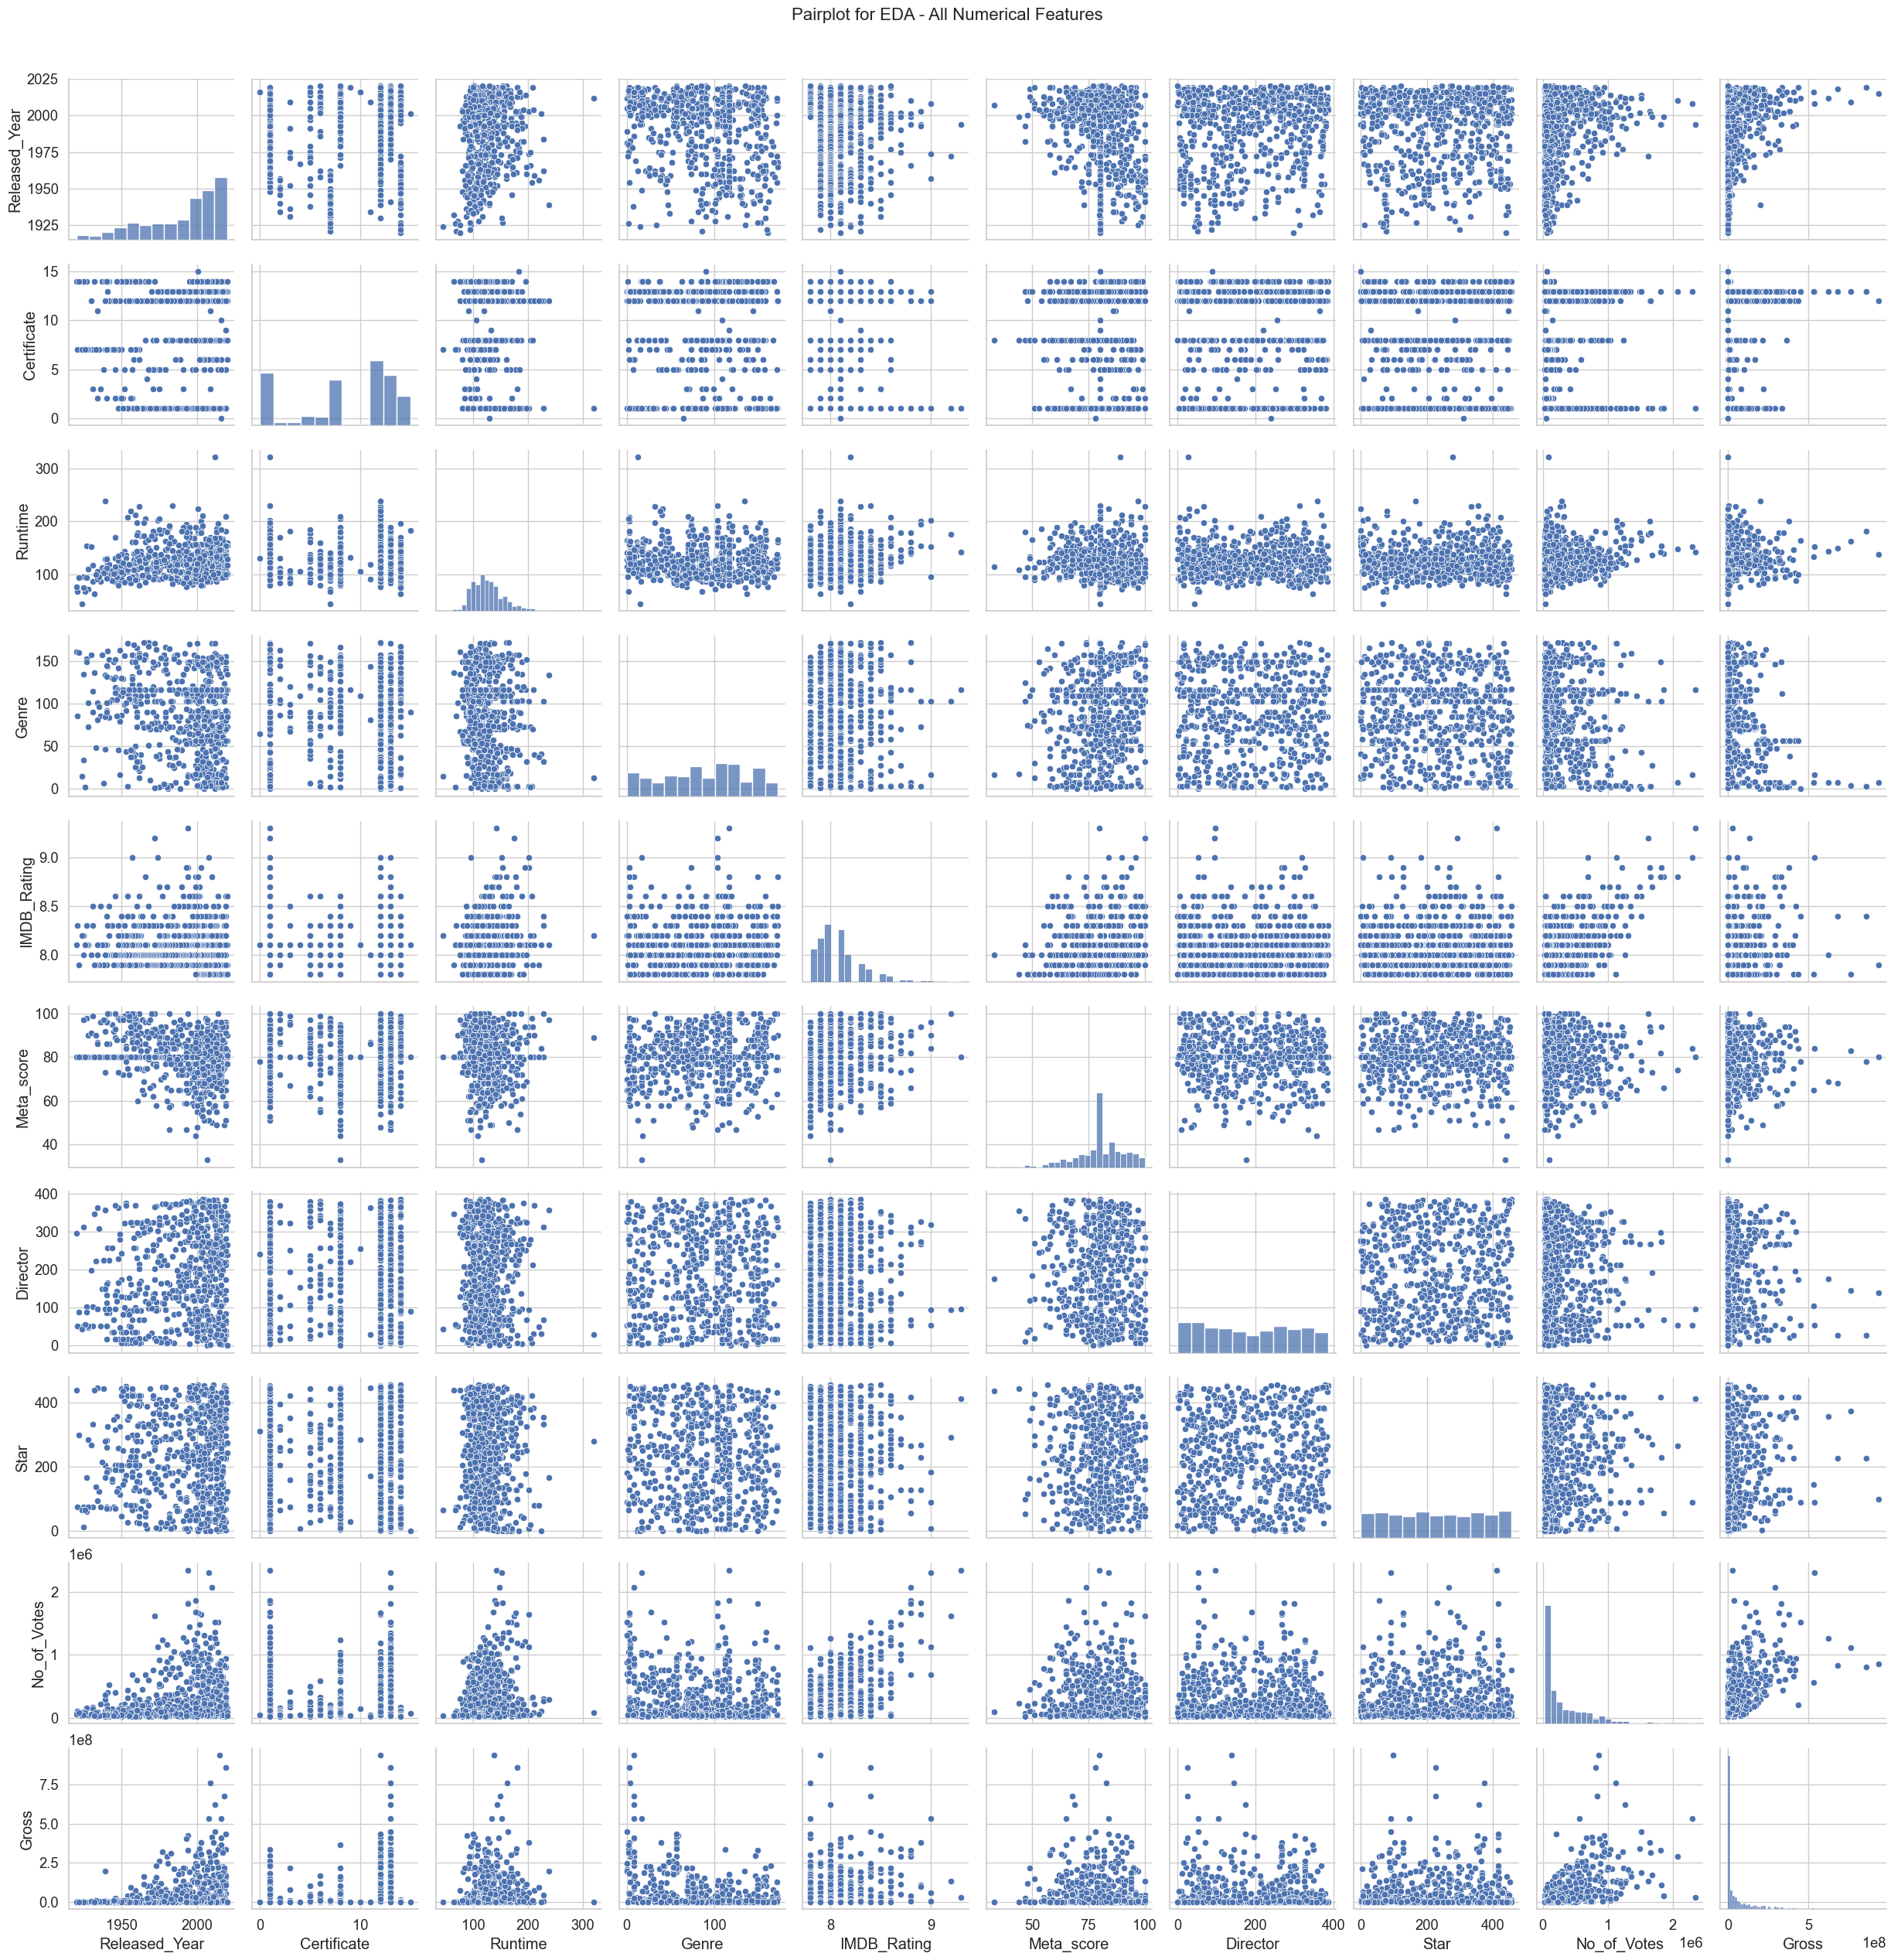

In [14]:
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 12))
pairplot = sns.pairplot(df, height=2.5, diag_kind='hist', corner=False) 
plt.suptitle("Pairplot for EDA - All Numerical Features", y=1.02, fontsize=16)
plt.show()

In [15]:
# Check unique class counts for each column
print("Class distribution for Certificate:")
print(df['Certificate'].value_counts())

print("\nClass distribution for Genre:")
print(df['Genre'].value_counts())

print("\nClass distribution for IMDB_Rating (binned):")
df['Rating_Category'] = pd.cut(df['IMDB_Rating'], bins=[0, 7.9, 8.2, 10], labels=['Low', 'Medium', 'High'])
print(df['Rating_Category'].value_counts())

Class distribution for Certificate:
Certificate
12    155
1     127
13    123
8      84
14     70
7      26
5      22
6      21
2       8
3       7
11      2
9       1
0       1
10      1
15      1
4       1
Name: count, dtype: int64

Class distribution for Genre:
Genre
117    57
149    25
103    21
73     20
85     20
       ..
60      1
83      1
82      1
41      1
42      1
Name: count, Length: 173, dtype: int64

Class distribution for IMDB_Rating (binned):
Rating_Category
Medium    335
Low       187
High      128
Name: count, dtype: int64


In [46]:
def enhanced_naive_bayes(X, y):
    #GaussianNB, MultinomialNB, and BernoulliNB on scaled and unscaled data.
    
    # Encode target labels if needed
    if y.dtype == 'object' or y.dtype == 'category':
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        y = le.fit_transform(y)

    y_binarized = label_binarize(y, classes=np.unique(y))
    n_classes = y_binarized.shape[1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))
    results = {}
    models = {
        "GaussianNB": GaussianNB(),
        "MultinomialNB": MultinomialNB(),
        "BernoulliNB": BernoulliNB()
    }
    
    # --- Unscaled Data ---
    print("Results on Unscaled Data:")
    for model_name, model in models.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)
            acc = accuracy_score(y_test, y_pred)
            results[f"{model_name} (Unscaled)"] = acc
            
            print(f"\n{model_name} Results:")
            print("Accuracy:", acc)
            print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
            print("Classification Report:\n", classification_report(y_test, y_pred))

            plt.figure(figsize=(8, 6))
            for i in range(n_classes):
                fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")
            
            plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
            plt.title(f"ROC Curve for {model_name}")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.legend(loc="lower right")
            plt.show()
        except Exception as e:
            print(f"{model_name} failed on unscaled data: {e}")
    
    # --- Scaled Data ---
    print("\nResults on Scaled Data:")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for model_name, model in models.items():
        try:
            model.fit(X_train_scaled, y_train)
            y_pred_scaled = model.predict(X_test_scaled)
            acc = accuracy_score(y_test, y_pred_scaled)
            y_proba = model.predict_proba(X_test_scaled)
            results[f"{model_name} (Scaled)"] = acc
            
            print(f"\n{model_name} Results:")
            print("Accuracy:", acc)
            print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_scaled))
            print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

            plt.figure(figsize=(8, 6))
            for i in range(n_classes):
                fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")
            
            plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
            plt.title(f"ROC Curve for {model_name}")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.legend(loc="lower right")
            plt.show()
        except Exception as e:
            print(f"{model_name} failed on scaled data: {e}")
    
    # --- Cross-Validation for GaussianNB ---
    print("\nCross-Validation for GaussianNB:")
    gnb = GaussianNB()
    scores = cross_val_score(gnb, X, y, cv=5)
    print("Cross-Validation Scores:", scores)
    print("Mean Cross-Validation Accuracy:", scores.mean())
    results["GaussianNB (Cross-Validation)"] = scores.mean()
    
    # Plot Results
    plt.figure(figsize=(10, 6))
    plt.bar(results.keys(), results.values(), color=['skyblue', 'orange', 'lightgreen', 'coral'])
    plt.title("Naive Bayes Methods: Accuracy Comparison")
    plt.xticks(rotation=45)
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.show()

Results on Unscaled Data:

GaussianNB Results:
Accuracy: 0.6
Confusion Matrix:
 [[13  0 18]
 [ 1  0 31]
 [ 2  0 65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.42      0.55        31
           1       0.00      0.00      0.00        32
           2       0.57      0.97      0.72        67

    accuracy                           0.60       130
   macro avg       0.46      0.46      0.42       130
weighted avg       0.49      0.60      0.50       130



C:\Users\yashm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


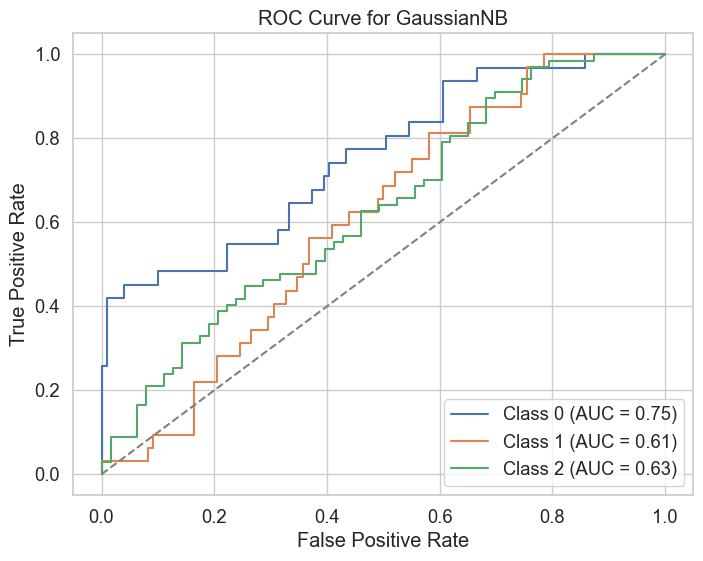


MultinomialNB Results:
Accuracy: 0.2846153846153846
Confusion Matrix:
 [[22  4  5]
 [23  7  2]
 [51  8  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.71      0.35        31
           1       0.37      0.22      0.27        32
           2       0.53      0.12      0.20        67

    accuracy                           0.28       130
   macro avg       0.38      0.35      0.27       130
weighted avg       0.42      0.28      0.25       130



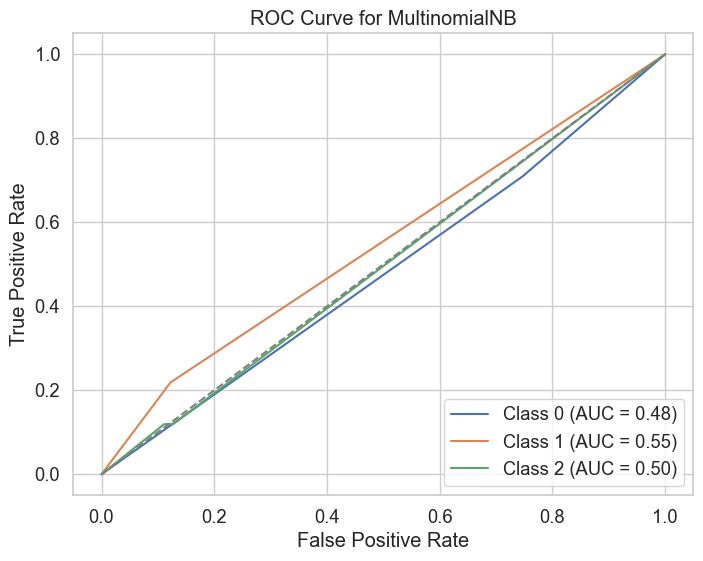


BernoulliNB Results:
Accuracy: 0.5153846153846153
Confusion Matrix:
 [[ 0  1 30]
 [ 0  0 32]
 [ 0  0 67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.00      0.00      0.00        32
           2       0.52      1.00      0.68        67

    accuracy                           0.52       130
   macro avg       0.17      0.33      0.23       130
weighted avg       0.27      0.52      0.35       130



C:\Users\yashm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


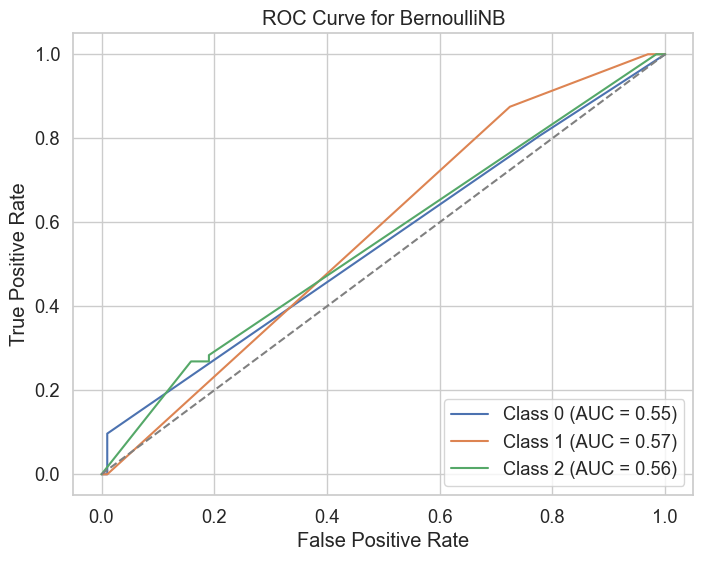


Results on Scaled Data:

GaussianNB Results:
Accuracy: 0.9923076923076923
Confusion Matrix:
 [[31  0  0]
 [ 0 32  0]
 [ 1  0 66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      1.00      1.00        32
           2       1.00      0.99      0.99        67

    accuracy                           0.99       130
   macro avg       0.99      1.00      0.99       130
weighted avg       0.99      0.99      0.99       130



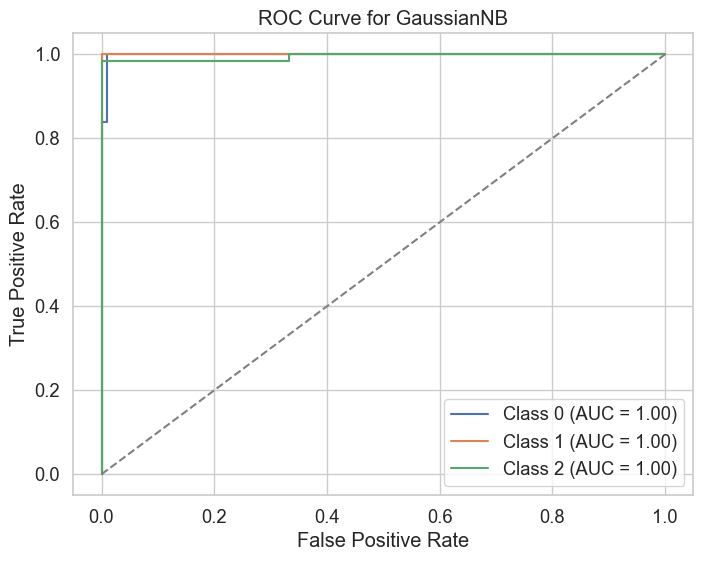

MultinomialNB failed on scaled data: Negative values in data passed to MultinomialNB (input X)

BernoulliNB Results:
Accuracy: 0.5538461538461539
Confusion Matrix:
 [[13  0 18]
 [ 0 27  5]
 [13 22 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.42      0.46        31
           1       0.55      0.84      0.67        32
           2       0.58      0.48      0.52        67

    accuracy                           0.55       130
   macro avg       0.54      0.58      0.55       130
weighted avg       0.55      0.55      0.54       130



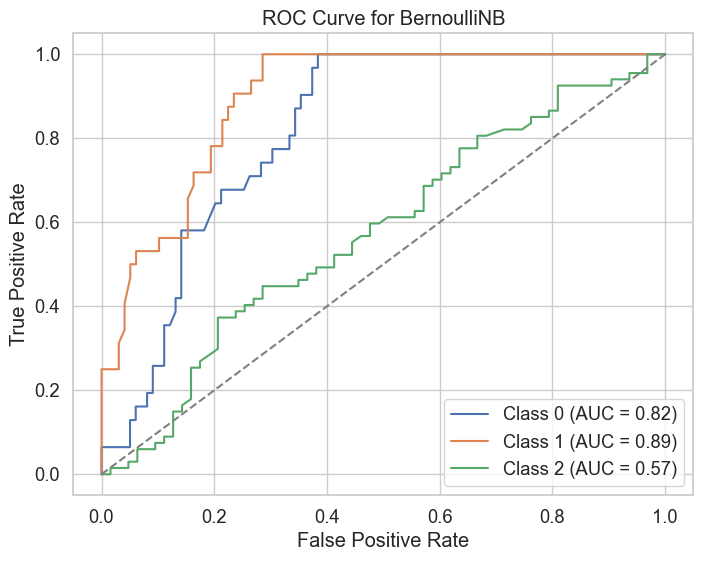


Cross-Validation for GaussianNB:
Cross-Validation Scores: [0.59230769 0.50769231 0.54615385 0.5        0.50769231]
Mean Cross-Validation Accuracy: 0.5307692307692308


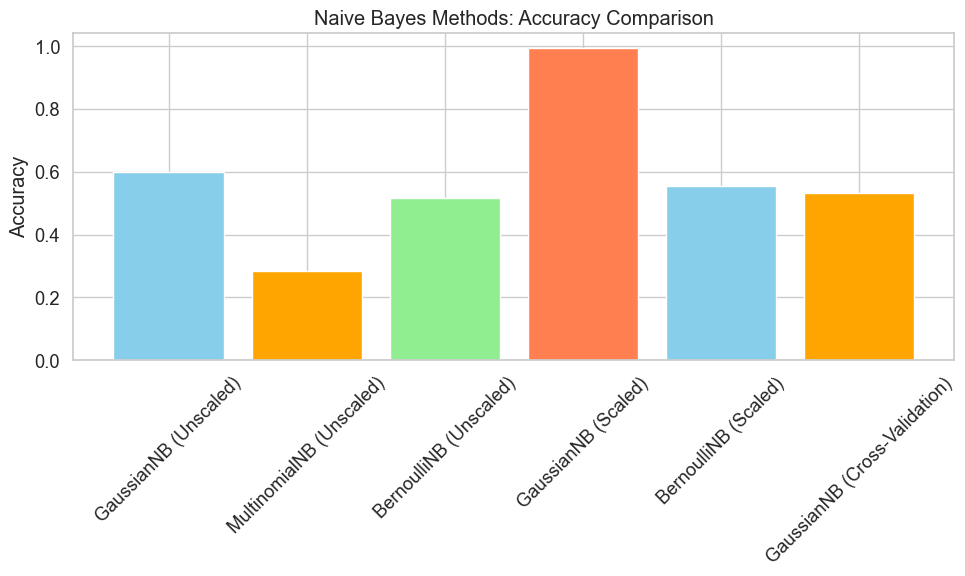

In [47]:
X = df.drop(columns=['Rating_Category'])  # Features
y = df['Rating_Category']  # Target
enhanced_naive_bayes(X, y)

**Unscaled**
1. GaussianNB struggles on unscaled data because it assumes normally distributed features. Without scaling, the model might misinterpret feature variances, leading to bias toward class 2 (largest class).
2. MultinomialNB is not suitable for the dataset's unscaled continuous features, as it assumes count or frequency-based features.
3. BernoulliNB is inappropriate here because it assumes binary feature distributions, which do not align with the dataset's characteristics.
   
**Scaled**
1. Scaling dramatically improves GaussianNB's performance because it relies on feature variances for computing probabilities. Without scaling, features with larger variances dominate the predictions.
2. MultinomialNB is unsuitable for this dataset unless features are transformed to be non-negative (e.g., using MinMaxScaler or log transformation).
3. BernoulliNB performs slightly better on scaled data but still struggles with non-binary features. It does not significantly benefit from scaling compared to GaussianNB.

**ROC**
1. GaussianNB: Expected to have high AUC for all classes after scaling.
2. BernoulliNB: Moderate to low AUC values, indicating less effective separation.
3. MultinomialNB: Not run on scaled data; if it does, AUC values will highlight its performance issues.